In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
data = [{ 'month': 'Jan', 'spending': 1000, 'earning': 2000 },
    { 'month': 'Feb', 'spending': 2000, 'earning': 2500 },
    { 'month': 'Mar', 'spending': 1500, 'earning': 1800 },
    { 'month': 'Apr', 'spending': 2500, 'earning': 2200 },
    { 'month': 'May', 'spending': 1800, 'earning': 2800 },
    { 'month': 'Jun', 'spending': 2000, 'earning': 2600 },
    { 'month': 'Jul', 'spending': 1700, 'earning': 2800 },
    { 'month': 'Aug', 'spending': 2200, 'earning': 2300 },
    { 'month': 'Sep', 'spending': 1900, 'earning': 2700 },
    { 'month': 'Oct', 'spending': 2300, 'earning': 2400 },
    { 'month': 'Nov', 'spending': 2000, 'earning': 3000 },
    { 'month': 'Dec', 'spending': 2500, 'earning': 2800 },
  ]

In [101]:
cleaned_dic = {'month':[], 'spending':[], 'earning':[]}

for d in data:
    cleaned_dic['month'].append(d['month'])
    cleaned_dic['spending'].append(d['spending'])
    cleaned_dic['earning'].append(d['earning'])
    print(d['month'], d['spending'], d['earning'])

Jan 1000 2000
Feb 2000 2500
Mar 1500 1800
Apr 2500 2200
May 1800 2800
Jun 2000 2600
Jul 1700 2800
Aug 2200 2300
Sep 1900 2700
Oct 2300 2400
Nov 2000 3000
Dec 2500 2800


In [102]:
df = pd.DataFrame(cleaned_dic)

In [103]:
def get_balance(data):
    s = data[0]
    e = data[1]
    return e-s

In [104]:
df['net'] = df[['spending', 'earning']].apply(get_balance, axis=1)

In [105]:
balance = 0
acc_balance = []
for i, spend, earn in df[['spending', 'earning']].itertuples():
    balance += earn - spend
    acc_balance.append(balance)

In [106]:
df['balance'] = acc_balance

In [107]:
df

,month,spending,earning,net,balance
0,Jan,1000,2000,1000,1000
1,Feb,2000,2500,500,1500
2,Mar,1500,1800,300,1800
3,Apr,2500,2200,-300,1500
4,May,1800,2800,1000,2500
5,Jun,2000,2600,600,3100
6,Jul,1700,2800,1100,4200
7,Aug,2200,2300,100,4300
8,Sep,1900,2700,800,5100
9,Oct,2300,2400,100,5200


Text(0, 0.5, 'balance')

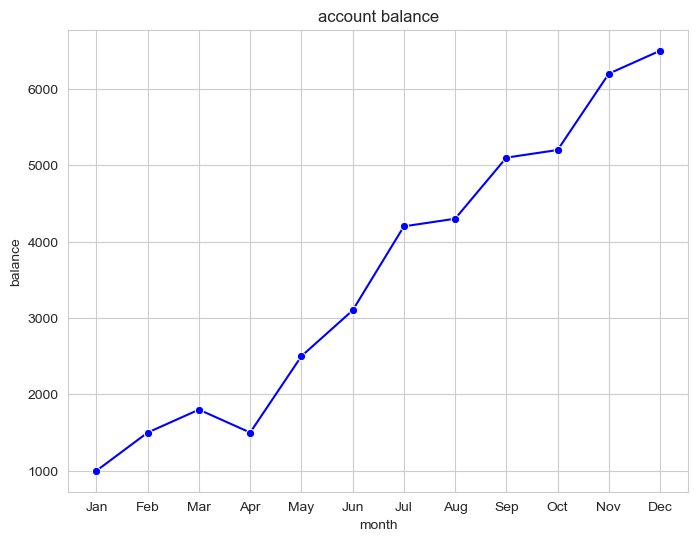

In [109]:
plt.figure(figsize=(8,6))
x_values = df['month']
y_values = df['balance']
sns.set_style('whitegrid')
sns.lineplot(x=x_values, y=y_values, marker='o', color='b')

plt.title('account balance')
plt.xlabel('month')
plt.ylabel('balance')

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm_balance = LinearRegression()

In [89]:
X = np.array([i for i in range(1, 13)]).reshape(-1, 1)
y = np.array(df['balance'])

In [92]:
lm_balance.fit(X, y)

LinearRegression()

In [132]:
m = lm_balance.coef_[0]
c = lm_balance.intercept_

Text(0, 0.5, 'balance')

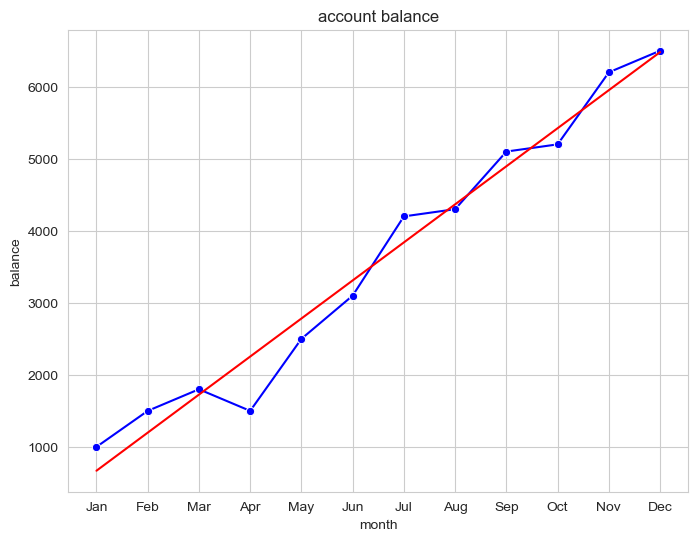

In [133]:
plt.figure(figsize=(8,6))
x_values = df['month']
y_values = df['balance']
pred = lm_balance.predict(X)

sns.set_style('whitegrid')

sns.lineplot(x=x_values, y=y_values, marker='o', color='b')
sns.lineplot(x=x_values, y=pred, color='r')

plt.title('account balance')
plt.xlabel('month')
plt.ylabel('balance')

In [134]:
index_month = {}
for i in range(1,13):
    index_month[i] = df['month'].iloc[i-1]

In [150]:
saving_goal = 20000
date_year = 2023

In [151]:
import math
index = math.ceil((float(saving_goal) - c)/m)
pred_month_i = index % 12 + 1
pred_month = index_month[pred_month_i]
pred_year = index // 12 + date_year
print(pred_month, pred_year)

Mar 2026


# For testing around

In [155]:
pred_based_on_input = lm_balance.predict(np.array([38]).reshape(-1,1))

In [156]:
pred_based_on_input

array([20217.13286713])